##  Survival Analyis of types of Regimes


Demo notebook from Lifelines documentation
https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html

In [2]:
# Lifeline package for the Survival Analysis
try: 
    from lifelines.datasets import load_dd
except:
    !pip install lifelines
    from lifelines.datasets import load_dd


In [3]:
import pandas as pd

https://lifelines.readthedocs.io/en/latest/lifelines.datasets.html

Cheibub, José Antonio, Jennifer Gandhi, and James Raymond Vreeland. 2010. “Democracy and Dictatorship Revisited.” Public Choice, vol. 143, no. 2-1, pp. 67-101.

In [4]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [5]:
regime_pivot = pd.pivot_table(data, index='regime', aggfunc='count')
regime_pivot

,cowcode2,ctryname,democracy,duration,ehead,leaderspellreg,observed,politycode,start_year,un_continent_name,un_region_name
regime,,,,,,,,,,,
Civilian Dict,330,330,330,330,330,330,330,329,330,330,330
Military Dict,236,236,236,236,236,236,236,236,236,236,236
Mixed Dem,275,275,275,275,275,275,275,275,275,275,275
Monarchy,55,55,55,55,55,55,55,55,55,55,55
Parliamentary Dem,585,585,585,585,585,585,585,579,585,585,585
Presidential Dem,327,327,327,327,327,327,327,327,327,327,327


In [6]:
democracy_pivot = pd.pivot_table( data, index='democracy', aggfunc='count')
democracy_pivot 

,cowcode2,ctryname,duration,ehead,leaderspellreg,observed,politycode,regime,start_year,un_continent_name,un_region_name
democracy,,,,,,,,,,,
Democracy,1187,1187,1187,1187,1187,1187,1181,1187,1187,1187,1187
Non-democracy,621,621,621,621,621,621,620,621,621,621,621


<Axes: xlabel='duration', ylabel='Count'>

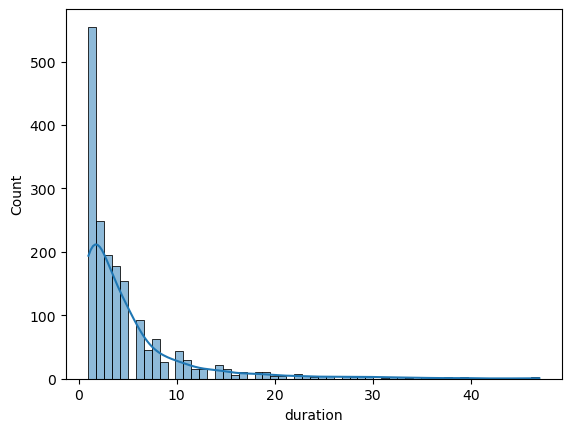

In [7]:
# Lets plot a histogram for the duration of the regimes
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['duration'], kde=True)

In [8]:
# retry with Plotly
import plotly.express as px
px.histogram(data, x='duration', nbins=50)

<Axes: xlabel='regime', ylabel='duration'>

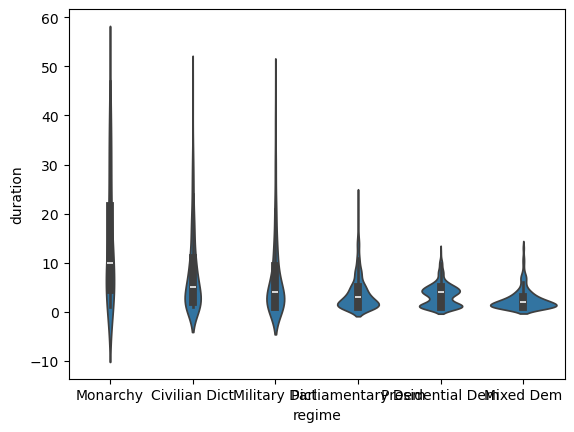

In [9]:
#can we make a violin plot with seaborn  duration  x regime
sns.violinplot(data=data, x="regime", y="duration")



<Axes: xlabel='regime', ylabel='duration'>

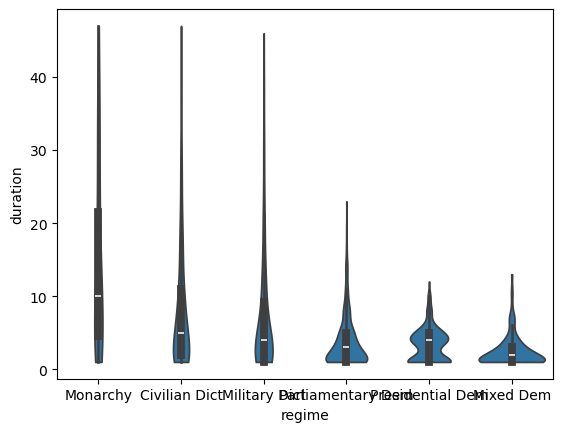

In [10]:
sns.violinplot(data=data, x="regime", y="duration", cut=0)


In [12]:
# Redo the violin plot but dont let the kde give negative values
fig = px.violin(data, x="regime", y="duration", box=True, points="all")
fig.update_layout(yaxis=dict(range=[0, max(data["duration"])]))
fig.show()


In [13]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [14]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

In [15]:
kmf.survival_function_.head(10)

,KM_estimate
timeline,
0.0,1.000000
1.0,0.721792
2.0,0.601973
3.0,0.510929
4.0,0.418835
5.0,0.334008
6.0,0.280902
7.0,0.256825
8.0,0.221975


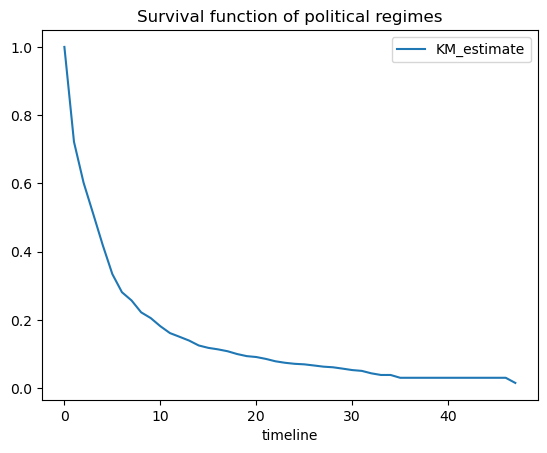

In [16]:
from matplotlib import pyplot as plt


kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

<Axes: xlabel='timeline'>

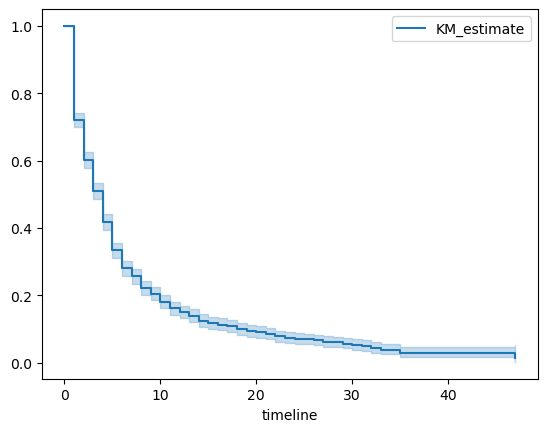

In [17]:
kmf.plot_survival_function()


In [18]:
kmf.median_survival_time_


np.float64(4.0)

In [19]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,3.0,4.0


In [20]:
dem = (data["democracy"] == "Democracy")

dem.head()

0    False
1    False
2    False
3    False
4    False
Name: democracy, dtype: bool

In [21]:
dem.mean()

np.float64(0.6565265486725663)

In [ ]:
ax = plt.subplot(111)

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");

In [ ]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()